In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os
df_production = pd.read_csv("data/Coffee_production.csv")
df_export = pd.read_csv("data/Coffee_export.csv")
df_import = pd.read_csv("data/Coffee_import.csv")
df_domestic_consumption = pd.read_csv("data/Coffee_domestic_consumption.csv")
df_importers_consumption = pd.read_csv("data/Coffee_importers_consumption.csv")
df_green_inventory = pd.read_csv("data/Coffee_green_coffee_inventorie.csv")
df_re_export = pd.read_csv("data/Coffee_re_export.csv")

def load_and_melt(path, value_name):
    df = pd.read_csv(path)
    df.columns = df.columns.str.strip()

    id_vars = df.select_dtypes(include="object").columns.tolist()
    value_vars = [c for c in df.columns if c not in id_vars]

    df_long = df.melt(
        id_vars=id_vars,
        value_vars=value_vars,
        var_name="Year",
        value_name=value_name
    )

    df_long["Year"] = (
        df_long["Year"]
        .astype(str)
        .str.extract(r"(\d{4})")[0]
    )

    df_long["Year"] = pd.to_numeric(df_long["Year"], errors="coerce")
    df_long = df_long.dropna(subset=["Year"])
    df_long["Year"] = df_long["Year"].astype(int)

    for col in id_vars:
        df_long[col] = (
            df_long[col]
            .astype(str)
            .str.strip()
            .str.upper()
        )

    return df_long
df_production = load_and_melt(
    "data/Coffee_production.csv",
    "Production"
)

df_export = load_and_melt(
    "data/Coffee_export.csv",
    "Export"
)

df_import = load_and_melt(
    "data/Coffee_import.csv",
    "Import"
)

df_domestic = load_and_melt(
    "data/Coffee_domestic_consumption.csv",
    "Domestic_Consumption"
)

df_importers = load_and_melt(
    "data/Coffee_importers_consumption.csv",
    "Importers_Consumption"
)

df_inventory = load_and_melt(
    "data/Coffee_green_coffee_inventorie.csv",
    "Green_Inventory"
)

df_re_export = load_and_melt(
    "data/Coffee_re_export.csv",
    "Re_Export"
)




In [2]:
df_export.sort_values

<bound method DataFrame.sort_values of                                Country  Year      Export
0                               ANGOLA  1990     5040000
1     BOLIVIA (PLURINATIONAL STATE OF)  1990     9360000
2                               BRAZIL  1990  1016160000
3                              BURUNDI  1990    35100000
4                             CAMEROON  1990   156660000
...                                ...   ...         ...
1645                         VENEZUELA  2019     3180000
1646                          VIET NAM  2019  1644000000
1647                             YEMEN  2019      720000
1648                            ZAMBIA  2019     1620000
1649                          ZIMBABWE  2019      360000

[1650 rows x 3 columns]>

In [3]:
df_production.isnull().sum()

Country        0
Coffee type    0
Year           0
Production     0
dtype: int64

In [4]:
df_production.groupby("Year")["Production"].sum()

Year
1990     5593800000
1991     6076140000
1992     5911260000
1993     5505540000
1994     5598840000
1995     5239260000
1996     6198660000
1997     5993220000
1998     6531960000
1999     7883040000
2000     6824640000
2001     6474120000
2002     7357500000
2003     6330180000
2004     6964740000
2005     6670080000
2006     8124000000
2007     7310520000
2008     8088060000
2009     7672440000
2010     8404500000
2011     8479620000
2012     9071040000
2013     9234540000
2014     9017940000
2015     9367560000
2016     9739080000
2017     9821580000
2018    10347780000
2019     9903180000
Name: Production, dtype: int64

In [5]:
#TỔNG SỐ NĂM
df_production["Year"].agg(["min", "max"])

min    1990
max    2019
Name: Year, dtype: int64

In [6]:
df_production["Country"].nunique()

55

In [7]:
(
    df_production
    .groupby("Country")["Production"]
    .apply(lambda x: x.isna().sum())
    .sort_values(ascending=False)
    .head(10)
)

Country
ANGOLA                              0
BOLIVIA (PLURINATIONAL STATE OF)    0
BRAZIL                              0
BURUNDI                             0
CAMEROON                            0
CENTRAL AFRICAN REPUBLIC            0
COLOMBIA                            0
CONGO                               0
COSTA RICA                          0
CUBA                                0
Name: Production, dtype: int64

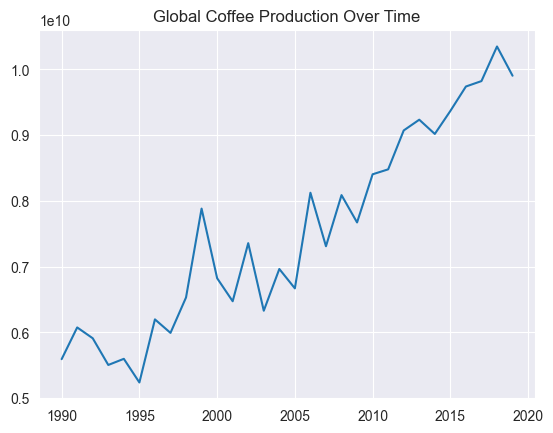

In [8]:
#SẢN LƯỢNG CÀ PHÊ TOÀN CẦU THEO NĂM
global_production = (
    df_production
    .groupby("Year", as_index=False)["Production"]
    .sum()
)

plt.plot(global_production["Year"], global_production["Production"])
plt.title("Global Coffee Production Over Time")
plt.show()

In [9]:
df_export

,Country,Year,Export
0,ANGOLA,1990,5040000
1,BOLIVIA (PLURINATIONAL STATE OF),1990,9360000
2,BRAZIL,1990,1016160000
3,BURUNDI,1990,35100000
4,CAMEROON,1990,156660000
...,...,...,...
1645,VENEZUELA,2019,3180000
1646,VIET NAM,2019,1644000000
1647,YEMEN,2019,720000
1648,ZAMBIA,2019,1620000


In [10]:
df_export.head()

,Country,Year,Export
0,ANGOLA,1990,5040000
1,BOLIVIA (PLURINATIONAL STATE OF),1990,9360000
2,BRAZIL,1990,1016160000
3,BURUNDI,1990,35100000
4,CAMEROON,1990,156660000


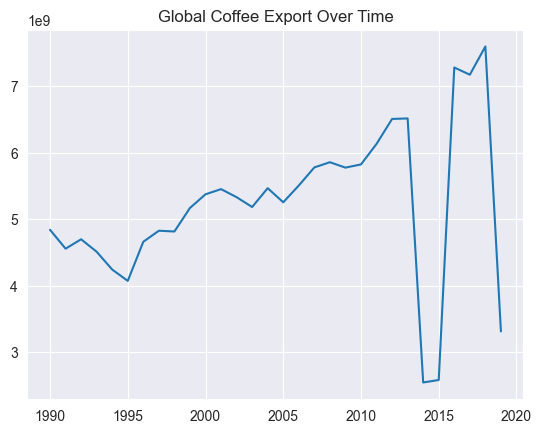

In [11]:
#XUẤT KHẨU TOÀN CẦU THEO NĂM
global_export = (
    df_export
    .groupby("Year", as_index=False)["Export"]
    .sum()
)

plt.plot(global_export["Year"], global_export["Export"])
plt.title("Global Coffee Export Over Time")
plt.show()

In [12]:
#TOP 10 QUỐC GIA SẢN XUẤT (NĂM MỚI NHẤT)
latest_year = df_production["Year"].max()

top_producers = (
    df_production[df_production["Year"] == latest_year]
    .sort_values("Production", ascending=False)
    .head(10)
)

top_producers[["Country", "Production"]]


,Country,Production
1597,BRAZIL,3492660000
1648,VIET NAM,1829220000
1618,COLOMBIA,846000000
1600,INDONESIA,685980000
1624,ETHIOPIA,440580000
1630,HONDURAS,355860000
1646,UGANDA,330540000
1631,INDIA,299280000
1636,MEXICO,239100000
1605,PERU,230160000


In [13]:
#THỨ HẠNG VIỆT NAM THEO THỜI GIAN
ranking = (
    df_production
    .sort_values(["Year", "Production"], ascending=[True, False])
    .assign(Rank=lambda x: x.groupby("Year")["Production"].rank(method="dense", ascending=False))
)

ranking[ranking["Country"] == "VIET NAM"]


,Country,Coffee type,Year,Production,Rank
53,VIET NAM,ROBUSTA/ARABICA,1990,78600000,17.0
108,VIET NAM,ROBUSTA/ARABICA,1991,86280000,17.0
163,VIET NAM,ROBUSTA/ARABICA,1992,140400000,9.0
218,VIET NAM,ROBUSTA/ARABICA,1993,181200000,8.0
273,VIET NAM,ROBUSTA/ARABICA,1994,217920000,6.0
328,VIET NAM,ROBUSTA/ARABICA,1995,238200000,7.0
383,VIET NAM,ROBUSTA/ARABICA,1996,345120000,4.0
438,VIET NAM,ROBUSTA/ARABICA,1997,418740000,4.0
493,VIET NAM,ROBUSTA/ARABICA,1998,423120000,4.0
548,VIET NAM,ROBUSTA/ARABICA,1999,697860000,2.0


In [14]:
df_production.groupby(["Year","Country"]).size().sort_values()

Year  Country                         
1990  ANGOLA                              1
      BOLIVIA (PLURINATIONAL STATE OF)    1
      BRAZIL                              1
      BURUNDI                             1
      CAMEROON                            1
                                         ..
2019  VENEZUELA                           1
      VIET NAM                            1
      YEMEN                               1
      ZAMBIA                              1
      ZIMBABWE                            1
Length: 1650, dtype: int64

In [15]:
df_export.groupby(["Year","Country"]).size().sort_values()

Year  Country                         
1990  ANGOLA                              1
      BOLIVIA (PLURINATIONAL STATE OF)    1
      BRAZIL                              1
      BURUNDI                             1
      CAMEROON                            1
                                         ..
2019  VENEZUELA                           1
      VIET NAM                            1
      YEMEN                               1
      ZAMBIA                              1
      ZIMBABWE                            1
Length: 1650, dtype: int64

In [16]:
df_pe = pd.merge(
    df_production,
    df_export,
    on=["Country", "Year"],
    how="inner"
)

df_pe["Export_ratio"] = df_pe["Export"] / df_pe["Production"]
df_pe.head()

,Country,Coffee type,Year,Production,Export,Export_ratio
0,ANGOLA,ROBUSTA/ARABICA,1990,3000000,5040000,1.680000
1,BOLIVIA (PLURINATIONAL STATE OF),ARABICA,1990,7380000,9360000,1.268293
2,BRAZIL,ARABICA/ROBUSTA,1990,1637160000,1016160000,0.620685
3,BURUNDI,ARABICA/ROBUSTA,1990,29220000,35100000,1.201232
4,ECUADOR,ARABICA/ROBUSTA,1990,90240000,107040000,1.186170


In [17]:
df_pe.count()

Country         1650
Coffee type     1650
Year            1650
Production      1650
Export          1650
Export_ratio    1595
dtype: int64

In [18]:
df_pe[df_pe["Export_ratio"] > 1][["Country", "Year", "Export_ratio"]]

,Country,Year,Export_ratio
0,ANGOLA,1990,1.680000
1,BOLIVIA (PLURINATIONAL STATE OF),1990,1.268293
3,BURUNDI,1990,1.201232
4,ECUADOR,1990,1.186170
7,MALAWI,1990,1.180952
...,...,...,...
1630,HONDURAS,2019,1.140617
1631,INDIA,2019,1.208500
1638,NICARAGUA,2019,1.024983
1641,SIERRA LEONE,2019,1.175000


In [19]:
#SỐ LƯỢNG SẢN XUẤT SO VỚI LƯỢNG TIÊU THỤ
df_pc = pd.merge(
    df_production,
    df_domestic,
    on=["Country", "Year"],
    how="inner"
)

df_pc["Surplus"] = df_pc["Production"] - df_pc["Domestic_Consumption"]
df_pc.head()

,Country,Coffee type_x,Year,Production,Coffee type_y,Domestic_Consumption,Surplus
0,ANGOLA,ROBUSTA/ARABICA,1990,3000000,ROBUSTA/ARABICA,1200000,1800000
1,BOLIVIA (PLURINATIONAL STATE OF),ARABICA,1990,7380000,ARABICA,1500000,5880000
2,BRAZIL,ARABICA/ROBUSTA,1990,1637160000,ARABICA/ROBUSTA,492000000,1145160000
3,BURUNDI,ARABICA/ROBUSTA,1990,29220000,ARABICA/ROBUSTA,120000,29100000
4,ECUADOR,ARABICA/ROBUSTA,1990,90240000,ARABICA/ROBUSTA,21000000,69240000


In [21]:
for c in df_inventory.columns:
    print(repr(c))

'Country'
'Year'
'Green_Inventory'


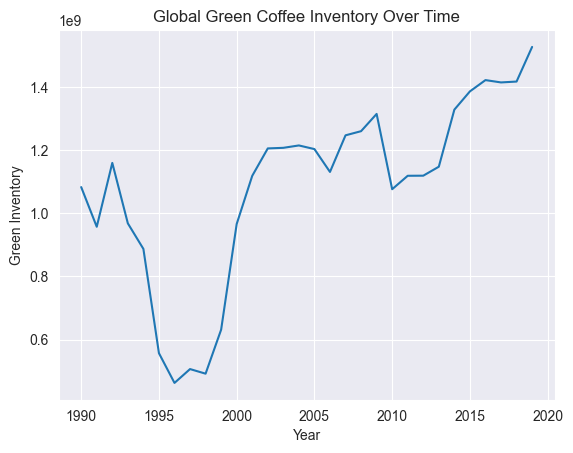

In [23]:
#XU HƯỚNG TOÀN CẦU
global_inventory = (
    df_inventory
    .groupby("Year", as_index=False)["Green_Inventory"]
    .sum(min_count=1)
)

import matplotlib.pyplot as plt

plt.plot(
    global_inventory["Year"],
    global_inventory["Green_Inventory"]
)
plt.title("Global Green Coffee Inventory Over Time")
plt.xlabel("Year")
plt.ylabel("Green Inventory")
plt.show()



In [24]:
#TOP QUỐC GIA TỒN KHO CAO (NĂM MỚI NHẤT)
latest_year = df_inventory["Year"].max()

top_inventory = (
    df_inventory[df_inventory["Year"] == latest_year]
    .sort_values("Green_Inventory", ascending=False)
    .head(10)
)

top_inventory


,Country,Year,Green_Inventory
539,UNSPECIFIED EU STOCKS,2019,536100000
538,UNITED STATES OF AMERICA,2019,410100000
527,GERMANY,2019,208740000
534,JAPAN,2019,176040000
530,NETHERLANDS,2019,42420000
532,SPAIN,2019,40200000
526,FRANCE,2019,27120000
529,ITALY,2019,25680000
536,SWITZERLAND,2019,22740000
531,PORTUGAL,2019,7740000
